In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('tomato_price2023-edited.csv')

In [4]:
df.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Davangere,Davangere,Tomato,Tomato,FAQ,1000,1600,1200,December
1,2,Davangere,Davangere,Tomato,Tomato,FAQ,800,1200,1000,December
2,3,Davangere,Davangere,Tomato,Tomato,FAQ,800,1200,1000,December
3,4,Davangere,Davangere,Tomato,Tomato,FAQ,1000,1500,1200,December
4,5,Davangere,Davangere,Tomato,Tomato,FAQ,1000,1600,1200,December


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl no.,216.0,108.500000,62.498000,1.0,54.75,108.5,162.25,216.0
Min Price (Rs./Quintal),216.0,1655.324074,1945.814085,300.0,600.00,800.0,1800.00,8000.0
Max Price (Rs./Quintal),216.0,2169.675926,2209.455239,500.0,1000.00,1400.0,2200.00,8500.0
Modal Price (Rs./Quintal),216.0,1911.805556,2073.915963,400.0,800.00,1200.0,2000.00,8200.0


In [6]:
df['Max Price (Rs./Quintal)'].mean()

2169.675925925926

In [7]:
df['Max Price (Rs./Quintal)'].std()

2209.4552388828897

In [8]:
df['Max Price (Rs./Quintal)'].var()

4881692.452627048

In [9]:
a = [600, 1000, 1400, 1800, 2500, 3000, 3500, 4500, 5000, 5500, 6000, 6500, 7000, 8000]

In [10]:
cdf_list = []
for price in a:
    # Count the number of occurances of price less than or equal to the value
    count = 0  
    for i in range(len(df)):
        if df['Max Price (Rs./Quintal)'][i] <= price:
            count += 1
    print(f'Number of occurances of price less than or equal to {price} = {count}') 
    # cdf calculation: Total days price is less than or equal to a / Total days
    cdf = round(count / len(df), 3)
    cdf_list.append(cdf)
    print(f'CDF or f({price}) = {cdf}')
        

Number of occurances of price less than or equal to 600 = 25
CDF or f(600) = 0.116
Number of occurances of price less than or equal to 1000 = 77
CDF or f(1000) = 0.356
Number of occurances of price less than or equal to 1400 = 112
CDF or f(1400) = 0.519
Number of occurances of price less than or equal to 1800 = 155
CDF or f(1800) = 0.718
Number of occurances of price less than or equal to 2500 = 178
CDF or f(2500) = 0.824
Number of occurances of price less than or equal to 3000 = 185
CDF or f(3000) = 0.856
Number of occurances of price less than or equal to 3500 = 185
CDF or f(3500) = 0.856
Number of occurances of price less than or equal to 4500 = 190
CDF or f(4500) = 0.88
Number of occurances of price less than or equal to 5000 = 190
CDF or f(5000) = 0.88
Number of occurances of price less than or equal to 5500 = 191
CDF or f(5500) = 0.884
Number of occurances of price less than or equal to 6000 = 193
CDF or f(6000) = 0.894
Number of occurances of price less than or equal to 6500 = 1

In [11]:
df['Max Price (Rs./Quintal)'][0]

1600

In [12]:
cdf_list
cdf_list_ggl_sht = [0.239, 0.298, 0.364, 0.433, 0.560, 0.646, 0.726, 0.854, 0.900, 0.934, 0.959, 0.975, 0.986, 0.996]

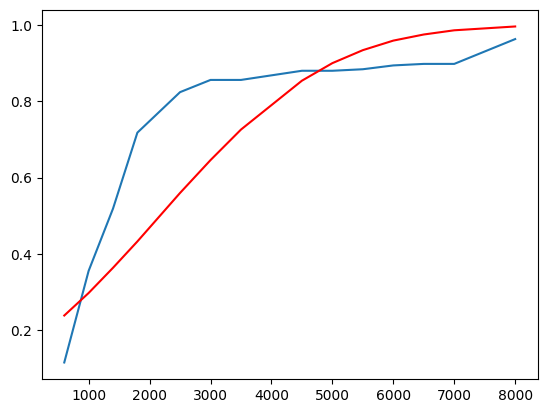

In [13]:
plt.plot(a, cdf_list)
plt.plot(a, cdf_list_ggl_sht, color='red')

In [14]:
import numpy as np
from scipy.integrate import quad
# Constants
mu = 2189.68
sigma = 2209.46

# PDF of the normal distribution
def pdf(x):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# CDF calculation function
def cdf(a):
    integral, error = quad(pdf, 0, a)
    return integral

# Values for a
a_values = [600, 1000, 1400, 1800, 2500, 3000, 3500, 4500, 5000, 5500, 6000, 6500, 7000, 8000]

# Calculate CDF for all a values
cdf_results = [cdf(a) for a in a_values]

# Print results
for a, result in zip(a_values, cdf_results):
    print(f"CDF({a}) = {result:.6f}")

CDF(600) = 0.075089
CDF(1000) = 0.134303
CDF(1400) = 0.199562
CDF(1800) = 0.269171
CDF(2500) = 0.395017
CDF(3000) = 0.482266
CDF(3500) = 0.562595
CDF(4500) = 0.691307
CDF(5000) = 0.737473
CDF(5500) = 0.772134
CDF(6000) = 0.796864
CDF(6500) = 0.813631
CDF(7000) = 0.824434
CDF(8000) = 0.834896


In [15]:
sample_cdf = [0.015,0.085, 0.145, 0.245, 0.30, 0.465, 0.66, 0.84, 0.935,0.985]
sample_cdf_2 = [0.017, 0.069, 0.14, 0.25, 0.32, 0.48, 0.64, 0.83, 0.94, 0.97]
b = [0, 300, 500, 700, 800, 1000, 1200, 1500, 1800, 2000]

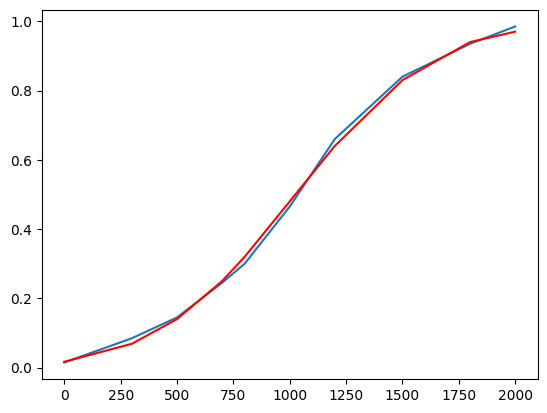

In [16]:
plt.plot(b, sample_cdf)
plt.plot(b, sample_cdf_2, color='red')